In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# KMeans


Visualize the observations in faithful.csv using a scatter plot.  
  
It contains two features: one of the features corresponds to the waiting time between eruptions and the second feature
corresponds to the duration of each eruption at the Old Faithful geyser in Yellowstone National Park in Wyoming. It contains 272 observations on 2 variables.   
  

Implement the 𝑘-means clustering algorithm from scratch and use it to cluster the data.  
  
  
Check for various values of 𝑘 and visually identify the appropriate cluster size.

In [2]:
df1 = pd.read_csv('faithful.csv',index_col=0)

In [3]:
df1

eruptions  waiting
1        3.600       79
2        1.800       54
3        3.333       74
4        2.283       62
5        4.533       85
..         ...      ...
268      4.117       81
269      2.150       46
270      4.417       90
271      1.817       46
272      4.467       74

[272 rows x 2 columns]

In [4]:
fig = px.scatter(df1, x = 'eruptions', y = 'waiting')
fig.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1)

In [6]:
px.scatter(x=df1_scaled[:,0], y = df1_scaled[:,1])

### Define some Helper functions

In [7]:
def Euclidean_dist(coord_ob1,coord_ob2): # input: two kx1 dimension arrays given k features
    dist = np.linalg.norm(coord_ob1-coord_ob2) # Euclidean distance between two points
    return float(dist)

def initial_centroid_idx(X, k, random_state = 0): # how many clusters (k) to initialize and get the index of the centroids 
    high = len(X)
    np.random.seed(random_state)
    idx = np.random.randint(low=0,high=high,size=k)
    return idx

## Build K Means Clustering from Scratch

In [8]:
# def K_means(X,k,random_state = 0,max_iter=300,verbose=False):
#     # If the user gives our algorithm an pandas data frame, 
#     # we need to convert it into a numpy array for faster calculation
#     if isinstance(X,pd.DataFrame):  
#         X = X.values
#     idx = initial_centroid_idx(X,k,random_state = random_state) # Get intial centroid indices
#     centroids = X[idx]  # Get intial centroid coordinates
#     _,cols = X.shape    # Get number of columns in the data
    
#     for iters in range(max_iter):
#         label = []
#         for i in range(len(X)):
#             distances = np.array([Euclidean_dist(center,X[i,:]) for center in centroids])
#             label_i = np.where(distances==np.amin(distances))[0][0]
#             label.append(label_i)
#         X_labeled = np.c_[X,label]
#         X_labeled_buckets = [X_labeled[X_labeled[:,cols]==k] 
#                             for k in np.unique(X_labeled[:,cols])]

#         centroids_new = np.array([np.mean(X_labeled_buckets[i][:,:cols], axis=0) for i in range(k)])
#         if np.sum(np.sum(np.abs(centroids_new - centroids))) <= 0.001:
#             break
#         centroids = centroids_new 
#         if verbose:
#             print(f'{iters}th iteration')
    
#     return label,centroids

In [9]:
class KMeans_Clustering:
    def __init__(self,k,random_state = 0,max_iter = 300, verbose = False):
        self.k = k   # k is # of clusters
        self.random_state = random_state  
        self.max_iter = max_iter  # maximum iters
        self.verbose = verbose    # print out iterations
    def fit(self, X):
        if isinstance(X,pd.DataFrame):  # check if the user inputs pandas dataframe
            X = X.values # if yes, then convert it into numpy arrays since it is faster
        idx = initial_centroid_idx(X,self.k,self.random_state) # Get intial centroid indices
        centroids = X[idx]  # Get intial centroid coordinates
        _,cols = X.shape    # Get number of columns in the data

        for iters in range(self.max_iter):
            label = [] 
            for i in range(len(X)): 
                # calculate the distance between observations i and each centroid.
                distances = np.array([Euclidean_dist(center,X[i,:]) for center in centroids]) 
                # assign the observation to its nearest centroid
                label_i = np.where(distances==np.amin(distances))[0][0]
                label.append(label_i)
            # assign labels to all of n obs
            X_labeled = np.c_[X,label]
            # divide data into k clusters
            X_labeled_buckets = [X_labeled[X_labeled[:,cols]==k] 
                                for k in np.unique(X_labeled[:,cols])]
            # calculate the new centroid for each cluster
            centroids_new = np.array([np.mean(X_labeled_buckets[i][:,:cols], axis=0) for i in range(self.k)])
            # stop critierion: absoulute flattened difference is less than some threshold
            if np.sum(np.sum(np.abs(centroids_new - centroids))) <= 0.01:
                break
            centroids = centroids_new 
            if self.verbose:
                print(f'{iters}th iteration')

        return label,centroids

In [10]:
model = KMeans_Clustering(k=2)
label,_ = model.fit(df1_scaled)

### Try two clusters

In [11]:
# label, centroids = K_means(X=df1_scaled,k=2)

In [12]:
cluster = ['cluster_1' if label==0 else 'cluster_2' for label in label]

In [13]:
px.scatter(x=df1_scaled[:,0], y = df1_scaled[:,1],color=cluster)

### Try 3 clusters

In [14]:
model = KMeans_Clustering(k=3)
label,_ = model.fit(df1_scaled)

In [15]:
cluster = []
for label_i in label:
    if label_i == 0:
        cluster.append('cluster_1')
    elif label_i == 1:
        cluster.append('cluster_2')
    elif label_i == 2:
        cluster.append('cluster_3')

In [16]:
px.scatter(x=df1_scaled[:,0], y = df1_scaled[:,1],color=cluster)

### Try 4 clusters

In [17]:
model = KMeans_Clustering(k=4)
label,_ = model.fit(df1_scaled)

In [18]:
cluster = []
for label_i in label:
    if label_i == 0:
        cluster.append('cluster_1')
    elif label_i == 1:
        cluster.append('cluster_2')
    elif label_i == 2:
        cluster.append('cluster_3')
    elif label_i == 3:
        cluster.append('cluster_4')

In [19]:
px.scatter(x=df1_scaled[:,0], y = df1_scaled[:,1],color=cluster)

## Based on our observation, we conclude 2 clusters is the optimum.

# Use Kmeans for Compressing Image

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # For plotting
import numpy as np

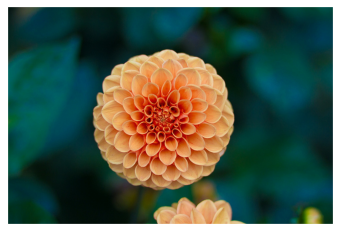

In [21]:
from sklearn.datasets import load_sample_image    # Datasets containing sample images in the scikit-learn library
flower = load_sample_image("flower.jpg")            # Loads a sample image flower.jpg
ax = plt.axes(xticks=[], yticks=[])               # Plot the image
ax.imshow(flower);

The image is stored in a three-dimensional array of height, width, RGB intensity. 

In [22]:
flower.shape

(427, 640, 3)

In [23]:
flower[:,:,0].shape

(427, 640)

We will now reshape the image to transform it from a three-dimensional array to a two-dimensional array and store the RGB intensity to lie between 0 and 1 for convenience.

In [24]:
data = flower / 255.0                # Converts RGB intensity to a [0,1] scale
data = data.reshape(427 * 640, 3)   # Reshapes the image
data.shape

(273280, 3)

To understand the variety of pixel colors in the image, let us choose 10000 pixels and plot their colors. 

In [25]:
# Define a plot_pixels function 

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Choose a random subset of pixels 

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # Define the axes and markets on the figure
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

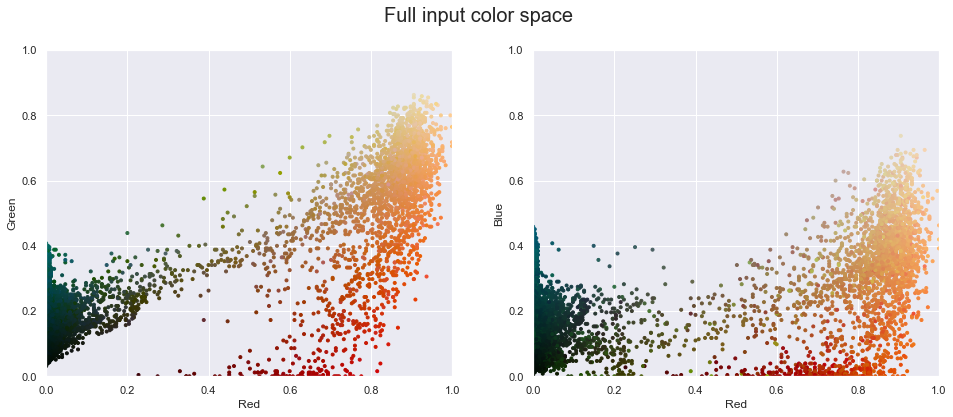

In [26]:
plot_pixels(data, title='Full input color space')


## Use our own K Means algorithm

In [27]:
import time

In [28]:
t0 = time.time()
model = KMeans_Clustering(k=16,max_iter=100,verbose=True)
label,centroids = model.fit(data)
#label,centroids = K_means(X=data,k=16,max_iter=100,verbose=True)
t1 = time.time()
total = t1-t0
print(total)

0th iteration
1th iteration
2th iteration
3th iteration
4th iteration
5th iteration
6th iteration
7th iteration
8th iteration
9th iteration
10th iteration
11th iteration
12th iteration
13th iteration
14th iteration
15th iteration
16th iteration
17th iteration
18th iteration
19th iteration
20th iteration
21th iteration
22th iteration
23th iteration
24th iteration
25th iteration
26th iteration
27th iteration
28th iteration
29th iteration
30th iteration
31th iteration
32th iteration
33th iteration
34th iteration
35th iteration
36th iteration
37th iteration
38th iteration
39th iteration
40th iteration
41th iteration
42th iteration
43th iteration
44th iteration
45th iteration
46th iteration
47th iteration
48th iteration
49th iteration
1430.8553981781006


### Our code runs for around 20 minutes.... By contrast, kmeans in sklearn runs for a second

### 1277s for 49 iterations. meaning around 30s per iteration.

In [29]:
# Import and run the minibatchkmeans function from sklearn

# from sklearn.cluster import MiniBatchKMeans

# # Perform K-means with K = 16 

# kmeans = MiniBatchKMeans(16)
# kmeans.fit(data)
# new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

# Plot the reduced color space using the 16 colors 

In [30]:
new_colors = centroids[label]

In [31]:
new_colors

array([[0.01115661, 0.06810404, 0.04574376],
       [0.01115661, 0.06810404, 0.04574376],
       [0.01115661, 0.06810404, 0.04574376],
       ...,
       [0.0148071 , 0.20657754, 0.11180109],
       [0.0148071 , 0.20657754, 0.11180109],
       [0.03210547, 0.12637282, 0.0964222 ]])

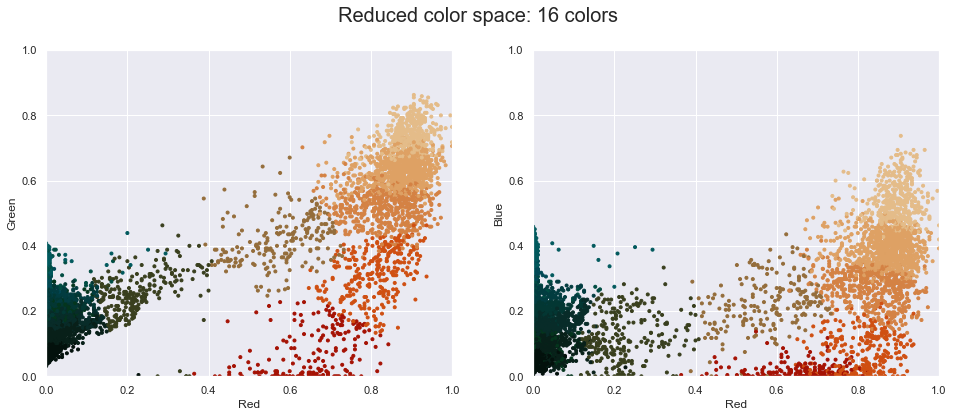

In [32]:
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

As can be seen in the image above, each pixel has been assigned the color of its closest cluster center.

Now, let us look at how the original image compares with the reduced image with 16 colors after K-means clustering.

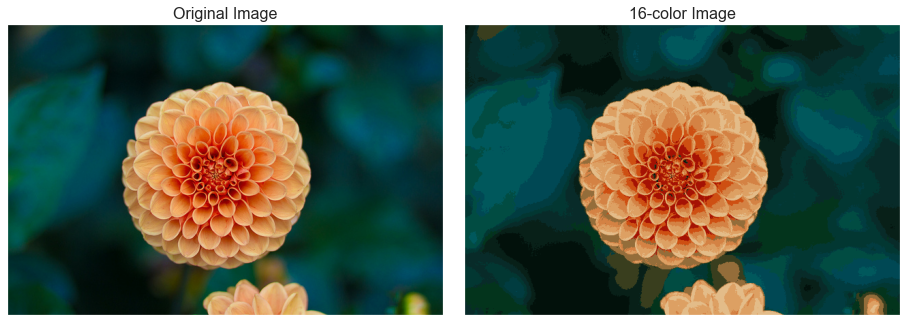

In [33]:
flower_recolored = new_colors.reshape(flower.shape) # Defines the recolored image

# Plots the original image and the recolored image for comparison

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Gaussian Mixture Model (GMM)

Gaussian mixture model from scratch and apply it on the dataset.

In [34]:
df2 = pd.read_csv('clustering_gmm.csv')

In [35]:
df2

Weight      Height
0    67.062924  176.086355
1    68.804094  178.388669
2    60.930863  170.284496
3    59.733843  168.691992
4    65.431230  173.763679
..         ...         ...
495  59.976983  169.679741
496  66.423814  174.625574
497  53.604698  161.919208
498  50.433644  160.794875
499  60.224392  169.689709

[500 rows x 2 columns]

In [36]:
fig = px.scatter(df2, x = 'Weight', y = 'Height')
fig.show()

## Try using our K Means Algorithm to fit to this data

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
df2_scaled = scaler_2.fit_transform(df2)

In [38]:
model = KMeans_Clustering(k=4)
label,centroids = model.fit(df2_scaled)
#label,centroids = K_means(X=df2_scaled,k=4)

In [39]:
cluster = []
for label_i in label:
    if label_i == 0:
        cluster.append('cluster_1')
    elif label_i == 1:
        cluster.append('cluster_2')
    elif label_i == 2:
        cluster.append('cluster_3')
    elif label_i == 3:
        cluster.append('cluster_4')

In [40]:
px.scatter(x=df2_scaled[:,0], y = df2_scaled[:,1],color=cluster)

As expected, the k means does not work well for clusters that have this kind of shapes.

# Try to implement Gaussian Mixture from scratch. 
## First we take a look at some definitions and pseudo code

Reference: https://github.com/mravanba/comp551-notebooks/blob/master/EMforGaussianMixture.ipynb
(Link shared by Jiahua Liang)

### Multivariate Normal Distribution Notation

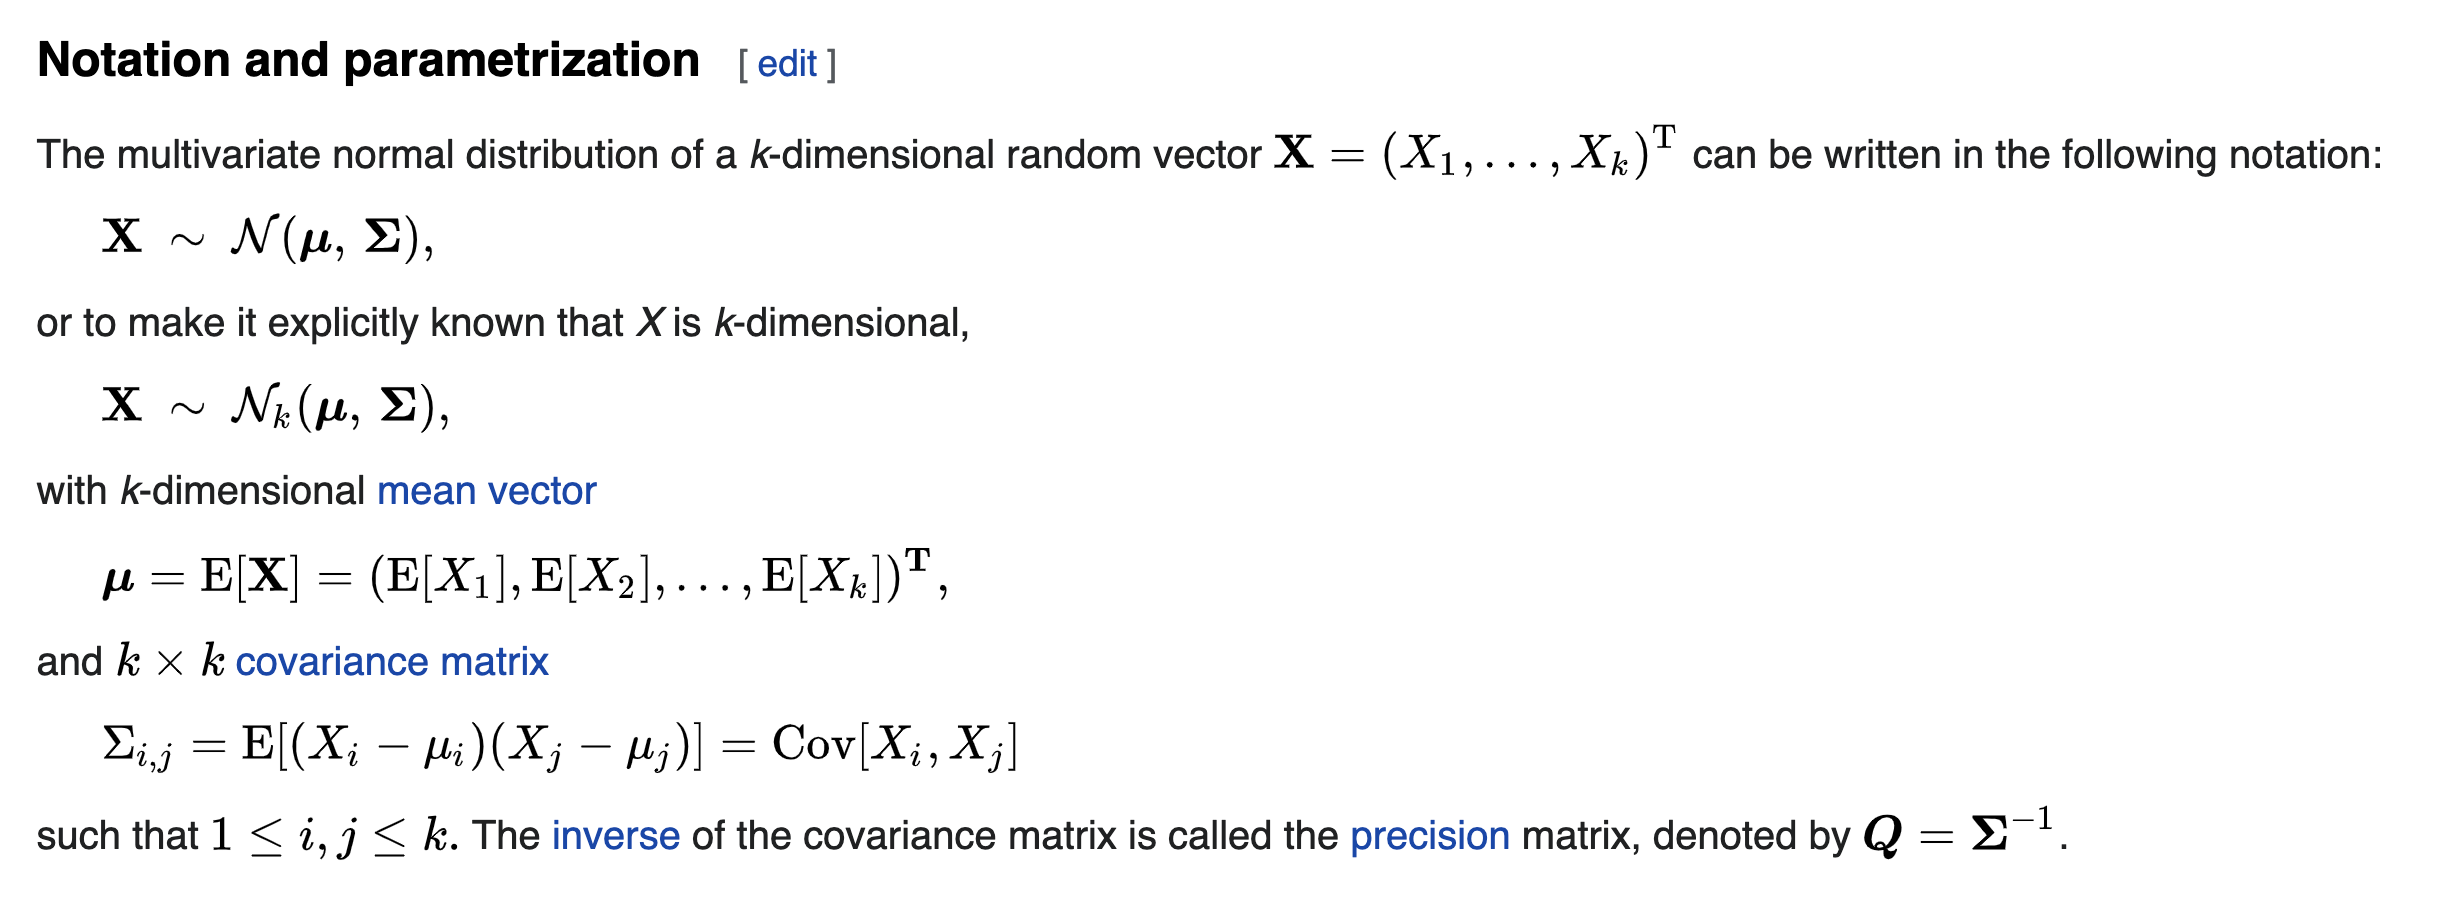

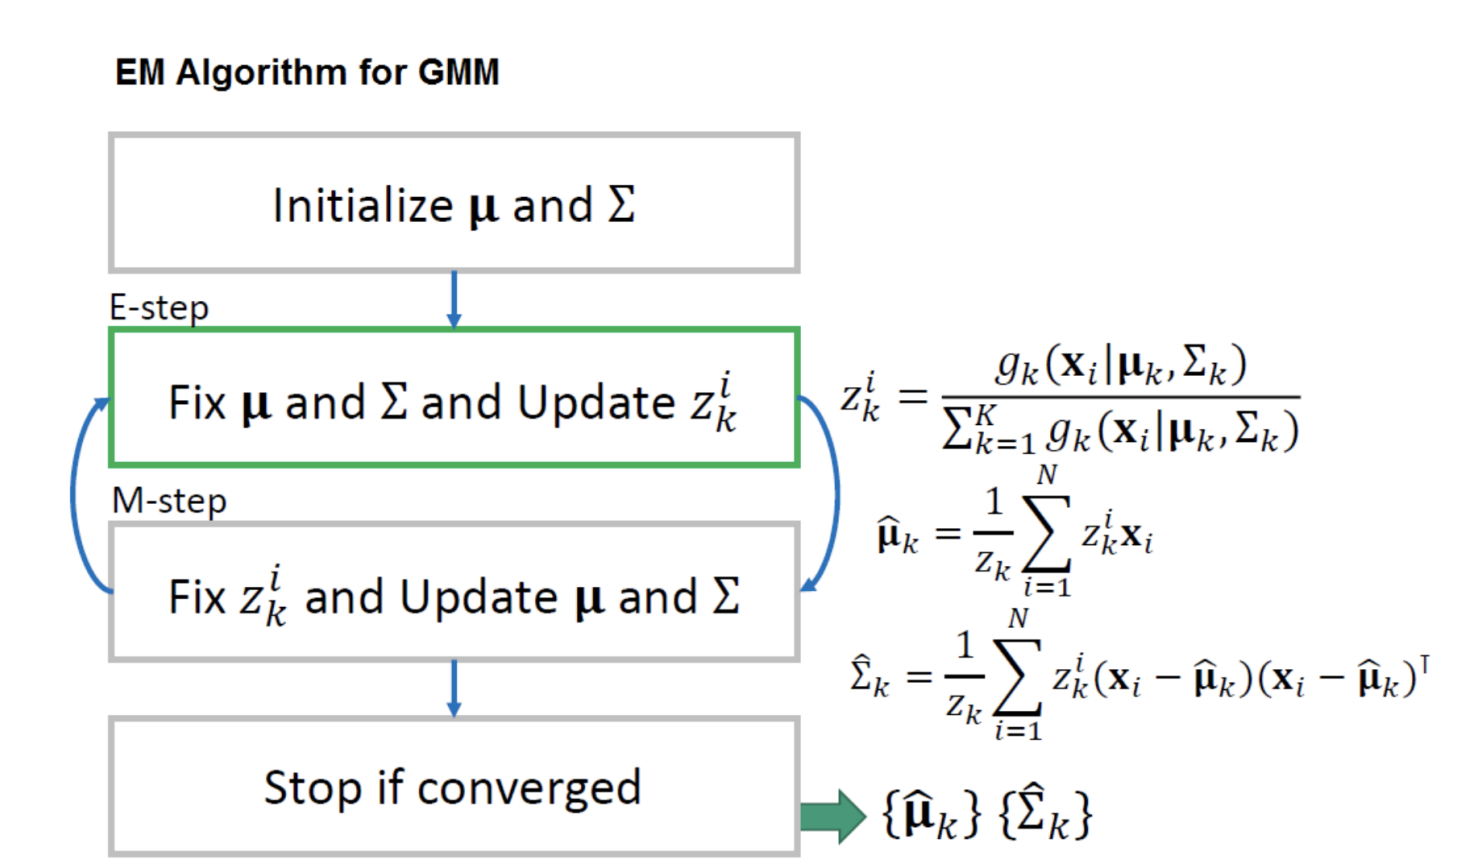

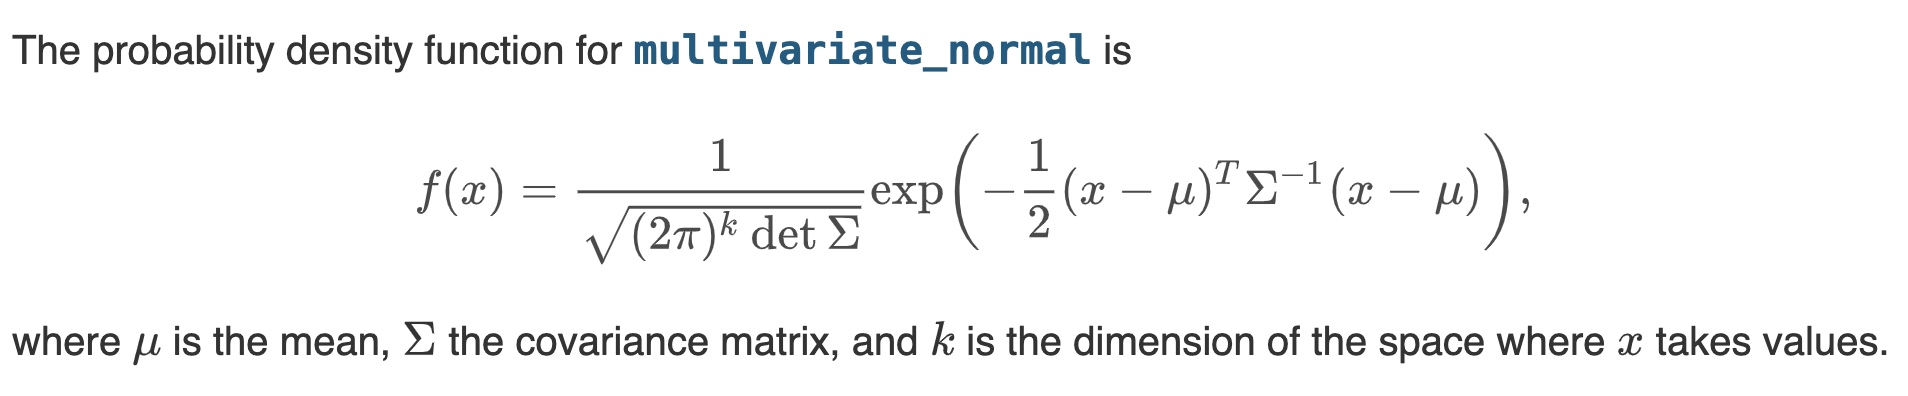

In [41]:
def multivariate_normal_pdf(x,mu,cov): # dims: n*k, k, k*k
    x_mu = (x-mu) # n * k 
    norm = (2*np.pi)**(-x.shape[1]/2) * np.linalg.det(cov)**(-1/2)
    exp = -0.5 * x_mu @ np.linalg.inv(cov) @ x_mu.T
    return np.diagonal(norm * np.exp(exp)) # 

In [42]:
# def Gaussian_Mixture_Model(X,k,max_iters = 300, random_state = 5, tolerence = 0.000001):
#     n,f = X.shape
#     np.random.seed(random_state)
#     idx = np.random.choice(n, k) # initialize means by setting them to k observations 
#     mu = X[idx]  
#     pi = np.ones(k)/k 
#     cov = np.tile(np.diag(np.var(X,axis=0)),(k,1,1)) 
#     z_mat= np.zeros((n,k))
#     ll = -np.inf
    
#     z_mat_init= z_mat.copy()
#     for iters in range(max_iters):
#         # update z_mat (Expectation)
#         for cluster_i in range(k):
#             z_mat[:,cluster_i] = pi[cluster_i] * multivariate_normal_pdf(X[:,:],mu[cluster_i],cov[cluster_i])
#         z_mat_norm = z_mat/np.sum(z_mat, axis=1,keepdims=True)

#         # update mu and cov  (Maximization)
#         for i in range(k): # i is cluster_i
#             mu[i] = np.average(X, axis=0, weights=z_mat_norm[:,i]) 
#             #computes the weighted average where the weights are given by responsibilities of the i-th Gaussian
#             cov[i] = np.cov(X, aweights=z_mat_norm[:,i], rowvar=False)

#         pi = np.sum(z_mat_norm,axis=0)/np.sum(np.sum(z_mat_norm,axis=0))

#         ll_new = np.mean(np.log(np.sum(z_mat, axis=1)))  
#         if np.abs(ll_new - ll) < tolerence:
#             break
#         ll = ll_new
#     labels = np.array([np.where(z_mat_norm[i] == np.amax(z_mat_norm[i]))[0][0] for i in range(len(z_mat_norm))])
#     X_labeled = np.concatenate((labels.reshape((-1,1)),X),axis = 1)
    
#     return X_labeled, mu
    

In [43]:
class GaussianMixture_Clustering:
    def __init__(self, k, max_iters = 300, random_state = 10, tolerance = 0.0001):
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state
        self.tolerance = tolerance
    
    def fit(self, X):
        n,f = X.shape
        np.random.seed(self.random_state)
        idx = np.random.choice(n, self.k) # initialize means by setting them to k observations (index)
        mu = X[idx]    # initialize means by setting them to k observations (actual values)
        pi = np.ones(self.k)/self.k   # initialize the probability (weight of each Gaussian in the mixture)
        cov = np.tile(np.diag(np.var(X,axis=0)),(self.k,1,1)) # covariance matrix
        z_mat= np.zeros((n,self.k))  # the z matrix storing unnormalized probs
        ll = -np.inf   # initialize loss function

        for iters in range(self.max_iters):
            # update z_mat (Expectation)
            for cluster_i in range(self.k):  # iterate thruugh each cluster
                z_mat[:,cluster_i] = pi[cluster_i] * multivariate_normal_pdf(X[:,:],mu[cluster_i],cov[cluster_i])
            z_mat_norm = z_mat/np.sum(z_mat, axis=1,keepdims=True) # normalize the z matrix

            # update mu and cov  (Maximization)
            for i in range(self.k): # i is cluster_i
                mu[i] = np.average(X, axis=0, weights=z_mat_norm[:,i]) 
                #computes the weighted average where the weights are given by responsibilities of the i-th Gaussian
                cov[i] = np.cov(X, aweights=z_mat_norm[:,i], rowvar=False)

            pi = np.sum(z_mat_norm,axis=0)/np.sum(np.sum(z_mat_norm,axis=0)) # update weights
            ll_new = np.mean(np.log(np.sum(z_mat, axis=1)))  # update loss value
            if np.abs(ll_new - ll) < self.tolerance:  # stop criterion: loss value changes within tolerance
                break
            ll = ll_new
        # get labels of all data and append them into original data frame(ndarray)    
        labels = np.array([np.where(z_mat_norm[i] == np.amax(z_mat_norm[i]))[0][0] for i in range(len(z_mat_norm))])
        X_labeled = np.concatenate((labels.reshape((-1,1)),X),axis = 1)

        return X_labeled, mu


In [44]:
model = GaussianMixture_Clustering(k=4,max_iters = 1000, random_state = 10)
X_labeled,_ = model.fit(df2_scaled)

In [45]:
# X_labeled,mu= Gaussian_Mixture_Model(df2_scaled,4,max_iters = 400, random_state = 6)

In [46]:
px.scatter(x=X_labeled[:,1],y=X_labeled[:,2],color=X_labeled[:,0])

In [47]:
model = GaussianMixture_Clustering(k=4,max_iters = 1000, random_state = 24)
X_labeled,_ = model.fit(df2_scaled)
px.scatter(x=X_labeled[:,1],y=X_labeled[:,2],color=X_labeled[:,0])

### The Gaussian Mixture is pretty unstable; given different initial cluster means, the model sometime cannot properly generates right clusters (see the image above)